# The random walk 

In [2]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (9,6)

## Simulate a random walk 

In [4]:
np.random.seed(0)

steps = np.random.standard_normal(1000)
steps[0]=0

random_walk = np.cumsum(steps)

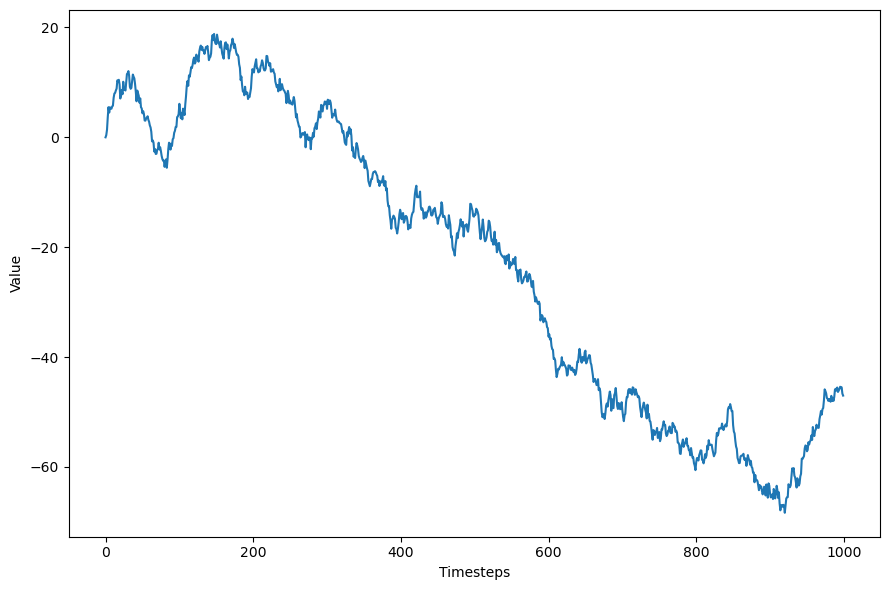

In [5]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

### Compare a stationary and a non-stationary series 

In [6]:
def simulate_timeseries(is_stationary: bool) -> np.array:
    np.random.seed(0)
    process = np.empty(400)
    
    if is_stationary:
        alpha = 0.8
        process[0] = 0
    else:
        alpha = 1
        process[0] = 0
        
    for i in range(400):
        if i+1 < 400:
            process[i+1] = alpha*process[i] + np.random.standard_normal()
        else:
            break
        
    return process

In [7]:
stationary = simulate_timeseries(True)
non_stationary = simulate_timeseries(False)

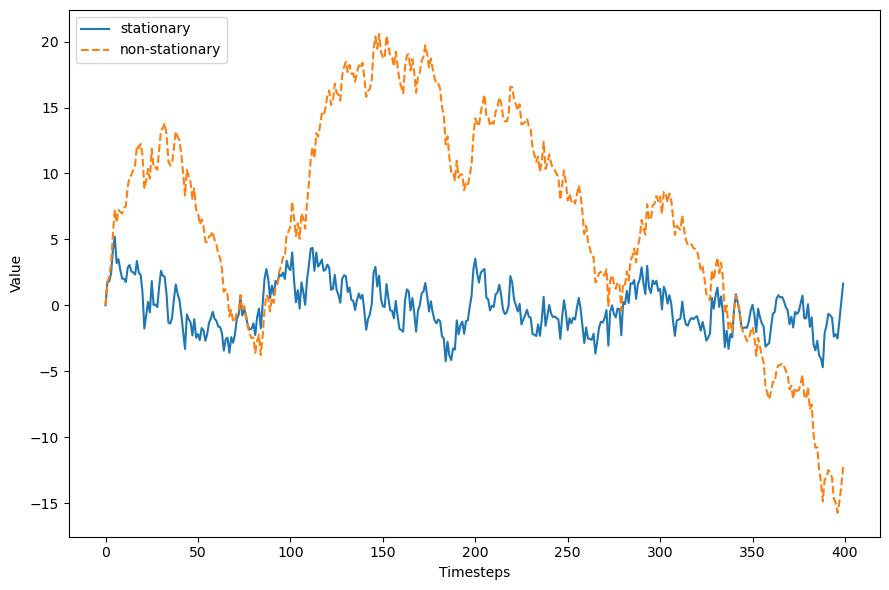

In [8]:
fig, ax = plt.subplots()

ax.plot(stationary, linestyle='-', label='stationary')
ax.plot(non_stationary, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.legend(loc=2)

plt.tight_layout()

In [9]:
def mean_over_time(process: np.array) -> np.array:
    mean_func = []
    
    for i in range(len(process)):
        mean_func.append(np.mean(process[:i]))
    
    return mean_func

In [10]:
stationary_mean = mean_over_time(stationary)
non_stationary_mean = mean_over_time(non_stationary)

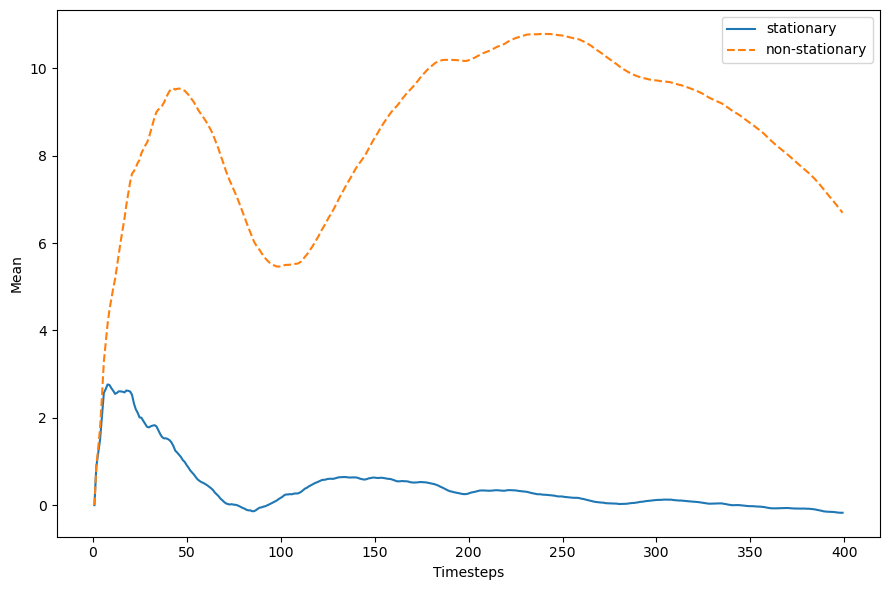

In [11]:
fig, ax = plt.subplots()

ax.plot(stationary_mean, label='stationary')
ax.plot(non_stationary_mean, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Mean')
ax.legend(loc=1)

plt.tight_layout()

In [12]:
def var_over_time(process: np.array) -> np.array:
    var_func = []
    
    for i in range(len(process)):
        var_func.append(np.var(process[:i]))
    
    return var_func

In [13]:
stationary_var = var_over_time(stationary)
non_stationary_var = var_over_time(non_stationary)

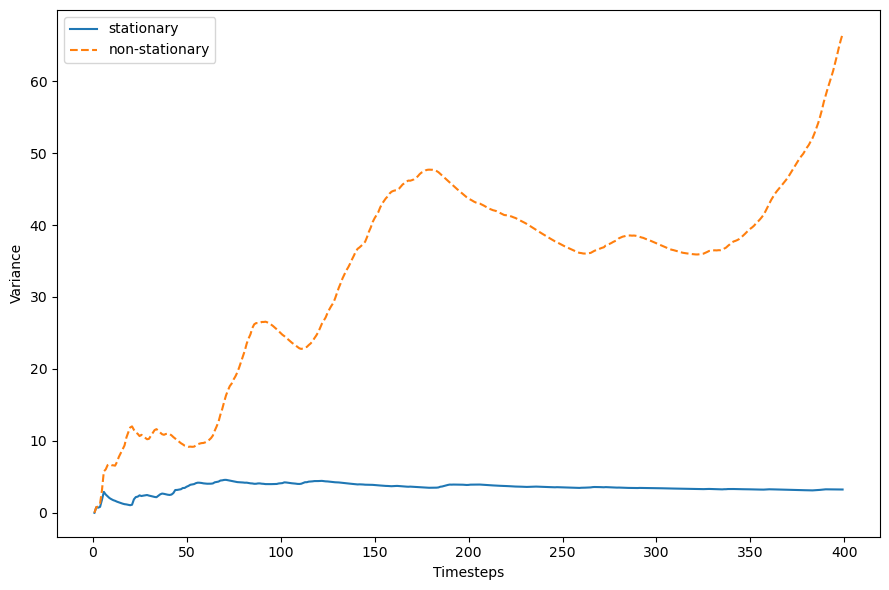

In [14]:
fig, ax = plt.subplots()

ax.plot(stationary_var, label='stationary')
ax.plot(non_stationary_var, linestyle='--', label='non-stationary')
ax.set_xlabel('Timesteps')
ax.set_ylabel('Variance')
ax.legend(loc=2)

plt.tight_layout()

### Using the Augmented Dickey-Fuller (ADF) test for stationarity

In [15]:
ADF_result = adfuller(random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -0.5437433594783752
p-value: 0.8831939389121152


You should get a p-value greater than 0.05, meaning that we fail to reject the null hypothesis and conclude that the series is not stationary.

In [16]:
diff_random_walk = np.diff(random_walk, n=1)

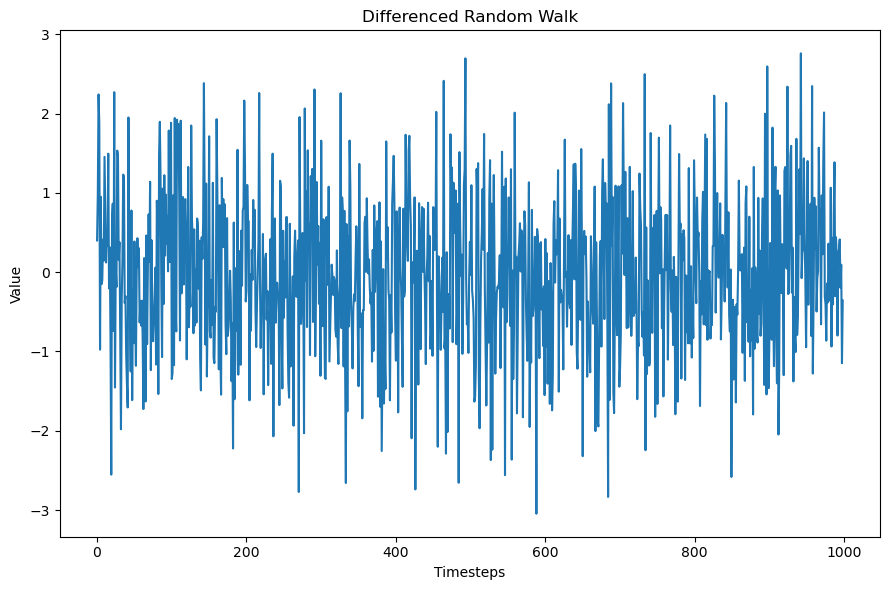

In [17]:
plt.plot(diff_random_walk)
plt.title('Differenced Random Walk')
plt.xlabel('Timesteps')
plt.ylabel('Value')
plt.tight_layout()

In [18]:
ADF_result = adfuller(diff_random_walk)

print(f'ADF Statistic: {ADF_result[0]}')
print(f'p-value: {ADF_result[1]}')

ADF Statistic: -32.42488720691621
p-value: 0.0


You should get a p-value smaller than 0.05. We reject the null hypothesis and conclude that the series is stationary.

### Plot the autocorrelation function (ACF) 

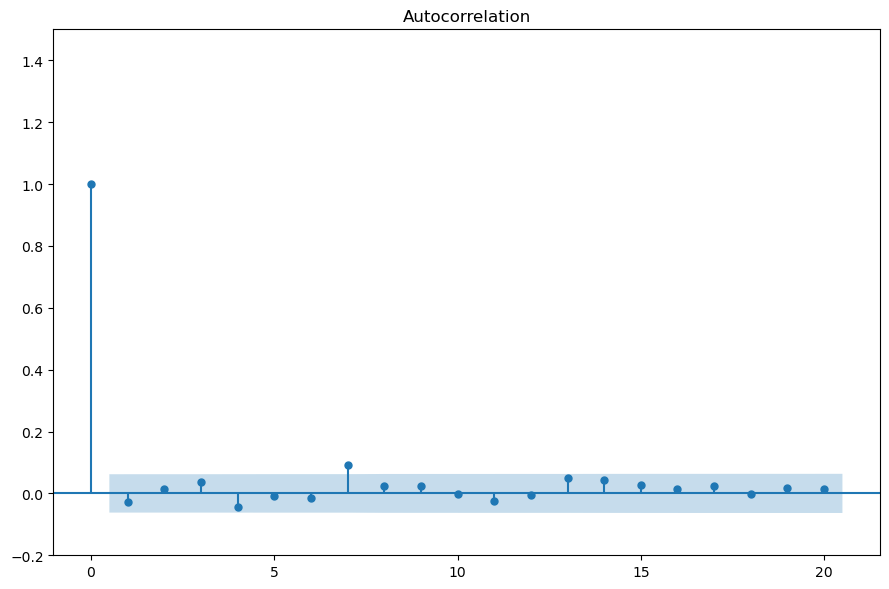

In [19]:
plot_acf(diff_random_walk, lags=20);

plt.ylim(-0.2, 1.5)
plt.tight_layout()

## Is AMZN a random walk? 

In [20]:
# Daily closing price of AMZN (Amazon) stock from October 5th 2021 to October 5th 2022

df = pd.read_csv('data/AMZN.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-10-05,160.225006,163.036499,160.123001,161.050003,161.050003,65384000
1,2021-10-06,160.676498,163.216995,159.931000,163.100494,163.100494,50660000
2,2021-10-07,164.576996,166.287506,164.153000,165.121506,165.121506,48182000
3,2021-10-08,165.850006,166.071503,164.410004,164.431000,164.431000,39964000
4,2021-10-11,163.750000,164.629501,161.904999,162.315002,162.315002,40684000


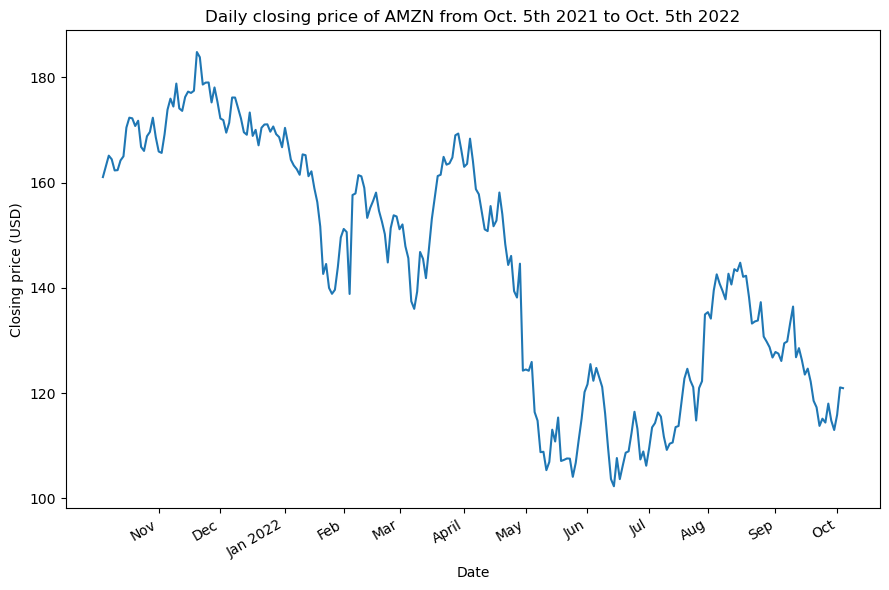

In [21]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(df['Date'], df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [19, 40, 62, 82, 101, 123, 144, 165, 186, 206, 229, 250], 
    ['Nov', 'Dec', 'Jan 2022', 'Feb', 'Mar', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

plt.title('Daily closing price of AMZN from Oct. 5th 2021 to Oct. 5th 2022')
fig.autofmt_xdate()
plt.tight_layout()

In [22]:
AMZN_ADF_result = adfuller(df['Close'])

print(f'ADF Statistic: {AMZN_ADF_result[0]}')
print(f'p-value: {AMZN_ADF_result[1]}')

ADF Statistic: -1.2571399125314004
p-value: 0.648545792935987


In [23]:
diff_close = np.diff(df['Close'], n=1)

In [24]:
AMZN_diff_ADF_result = adfuller(diff_close)

print(f'ADF Statistic: {AMZN_diff_ADF_result[0]}')
print(f'p-value: {AMZN_diff_ADF_result[1]}')

ADF Statistic: -16.316929753009752
p-value: 3.155381839110065e-29


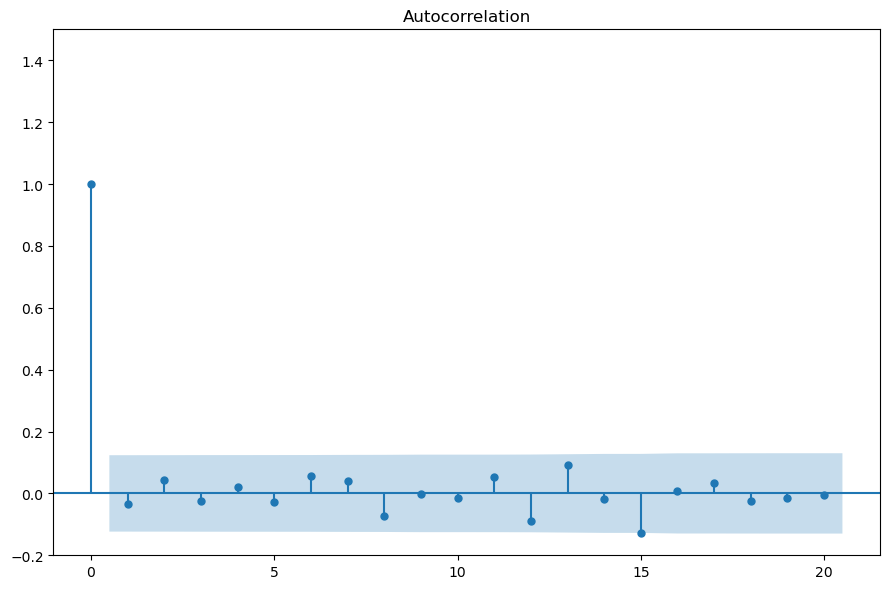

In [25]:
plot_acf(diff_close, lags=20);

plt.ylim(-0.2, 1.5)
plt.tight_layout()

## Forecasting a random walk
### Forecasting on a long horizon

In [26]:
df = pd.DataFrame({'value': random_walk})

train = df[:800]
test = df[800:]

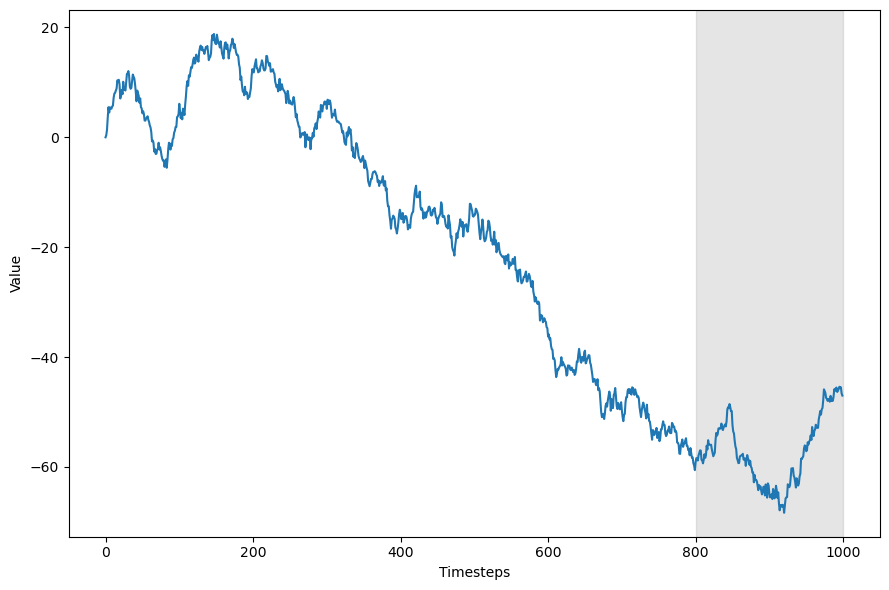

In [27]:
fig, ax = plt.subplots()

ax.plot(random_walk)
ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')
ax.axvspan(800, 1000, color='#808080', alpha=0.2)

plt.tight_layout()

In [28]:
mean = np.mean(train.value)

test.loc[:, 'pred_mean'] = mean

test.head()

,value,pred_mean
800,-59.178089,-14.296577
801,-58.392285,-14.296577
802,-58.449755,-14.296577
803,-58.840972,-14.296577
804,-57.900054,-14.296577


In [29]:
last_value = train.iloc[-1].value

test.loc[:, 'pred_last'] = last_value

test.head()

,value,pred_mean,pred_last
800,-59.178089,-14.296577,-60.589261
801,-58.392285,-14.296577,-60.589261
802,-58.449755,-14.296577,-60.589261
803,-58.840972,-14.296577,-60.589261
804,-57.900054,-14.296577,-60.589261


In [30]:
deltaX = 800 - 1
deltaY = last_value - 0

drift = deltaY / deltaX

x_vals = np.arange(801, 1001, 1)

pred_drift = drift * x_vals

test.loc[:, 'pred_drift'] = pred_drift

test.head()

,value,pred_mean,pred_last,pred_drift
800,-59.178089,-14.296577,-60.589261,-60.740924
801,-58.392285,-14.296577,-60.589261,-60.816755
802,-58.449755,-14.296577,-60.589261,-60.892587
803,-58.840972,-14.296577,-60.589261,-60.968418
804,-57.900054,-14.296577,-60.589261,-61.044250


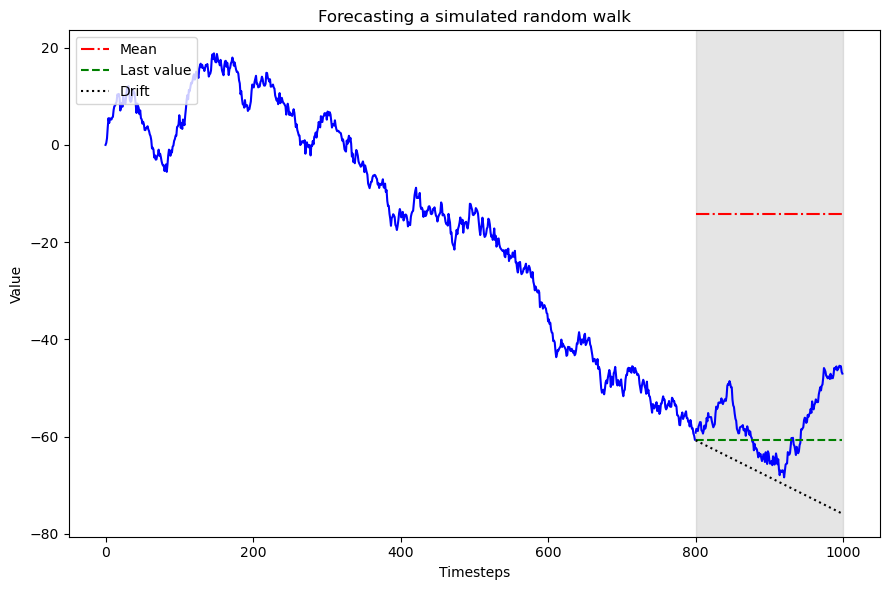

In [31]:
fig, ax = plt.subplots()

ax.plot(train.value, 'b-')
ax.plot(test['value'], 'b-')
ax.plot(test['pred_mean'], 'r-.', label='Mean')
ax.plot(test['pred_last'], 'g--', label='Last value')
ax.plot(test['pred_drift'], 'k:', label='Drift')

ax.axvspan(800, 1000, color='#808080', alpha=0.2)
ax.legend(loc=2)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.title('Forecasting a simulated random walk')

plt.tight_layout()

#### Evaluation 

In [33]:
from sklearn.metrics import mean_absolute_error

mae_mean = mean_absolute_error(test['value'], test['pred_mean'])
mae_last = mean_absolute_error(test['value'], test['pred_last'])
mae_drift = mean_absolute_error(test['value'], test['pred_drift'])

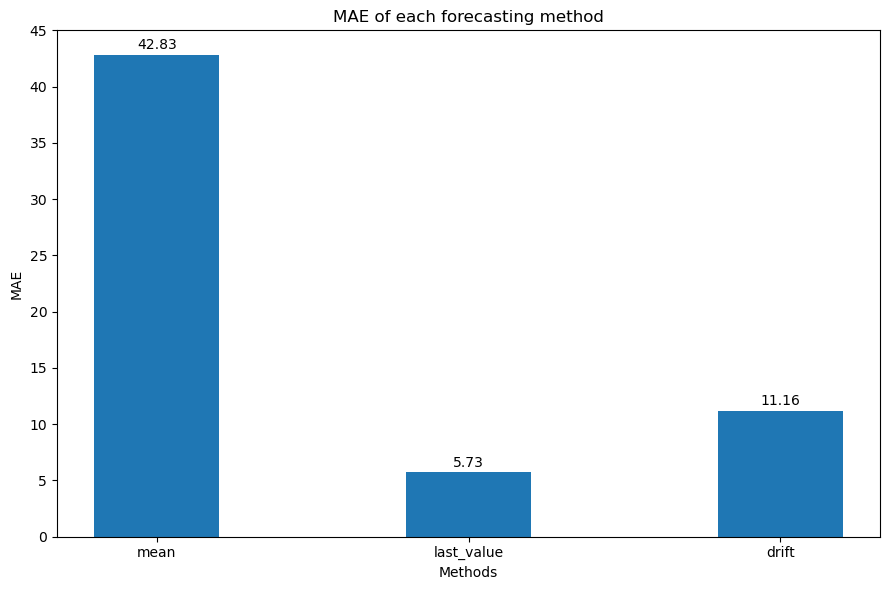

In [34]:
fig, ax = plt.subplots()

x = ['mean', 'last_value', 'drift']
y = [mae_mean, mae_last, mae_drift]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MAE')
ax.set_ylim(0, 45)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.5, s=str(round(value, 2)), ha='center')

plt.title('MAE of each forecasting method')
plt.tight_layout()

### Forecasting the closing price of AMZN 

In [35]:
AMZN_df = pd.read_csv('data/AMZN.csv')

AMZN_train = AMZN_df[:-50]
AMZN_test = AMZN_df[-50:]

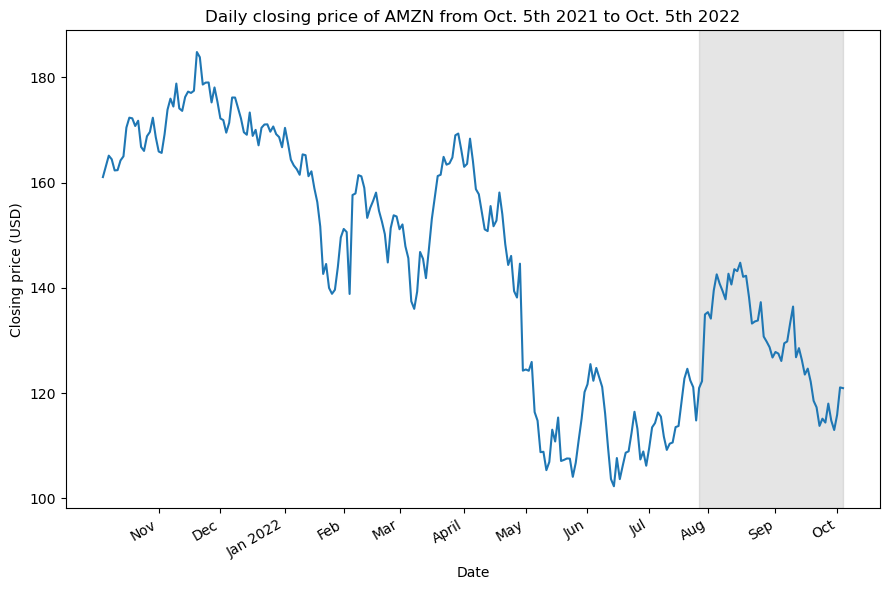

In [36]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(AMZN_df['Date'], AMZN_df['Close'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [19, 40, 62, 82, 101, 123, 144, 165, 186, 206, 229, 250], 
    ['Nov', 'Dec', 'Jan 2022', 'Feb', 'Mar', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

ax.axvspan(203, 252, color='#808080', alpha=0.2)

plt.title('Daily closing price of AMZN from Oct. 5th 2021 to Oct. 5th 2022')

fig.autofmt_xdate()
plt.tight_layout()

In [37]:
# Predict the historical mean

mean = np.mean(AMZN_train['Close'])
AMZN_test.loc[:, 'pred_mean'] = mean

# Predict the mean of the last known 50 days
mean_50 = np.mean(AMZN_train['Close'][-50:])
AMZN_test.loc[:, 'pred_mean_50'] = mean_50

# Predict the last known value
last_value = AMZN_train['Close'].iloc[-1]
AMZN_test.loc[:, 'pred_last'] = last_value

# Predict with drift
deltaX = 203 - 1
deltaY = last_value - AMZN_train['Close'].iloc[0]

drift = deltaY / deltaX

x_vals = np.arange(203, 253, 1)

pred_drift = drift * x_vals + AMZN_train['Close'].iloc[0]

AMZN_test.loc[:, 'pred_drift'] = pred_drift

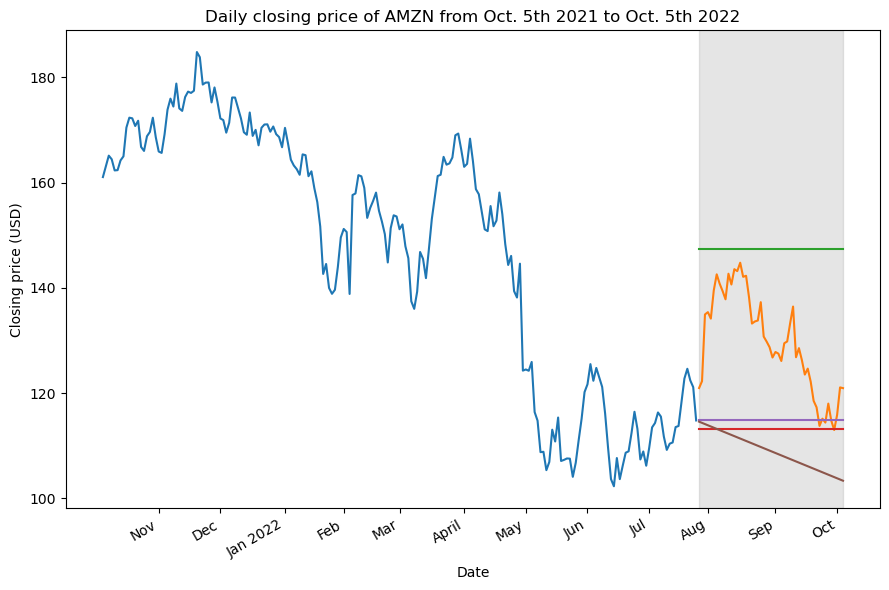

In [38]:
fig, ax = plt.subplots(figsize=(9,6))

ax.plot(AMZN_train['Close'])
ax.plot(AMZN_test['Close'])
ax.plot(AMZN_test['pred_mean'])
ax.plot(AMZN_test['pred_mean_50'])
ax.plot(AMZN_test['pred_last'])
ax.plot(AMZN_test['pred_drift'])
ax.set_xlabel('Date')
ax.set_ylabel('Closing price (USD)')

plt.xticks(
    [19, 40, 62, 82, 101, 123, 144, 165, 186, 206, 229, 250], 
    ['Nov', 'Dec', 'Jan 2022', 'Feb', 'Mar', 'April', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct'])

ax.axvspan(203, 252, color='#808080', alpha=0.2)

plt.title('Daily closing price of AMZN from Oct. 5th 2021 to Oct. 5th 2022')

fig.autofmt_xdate()
plt.tight_layout()

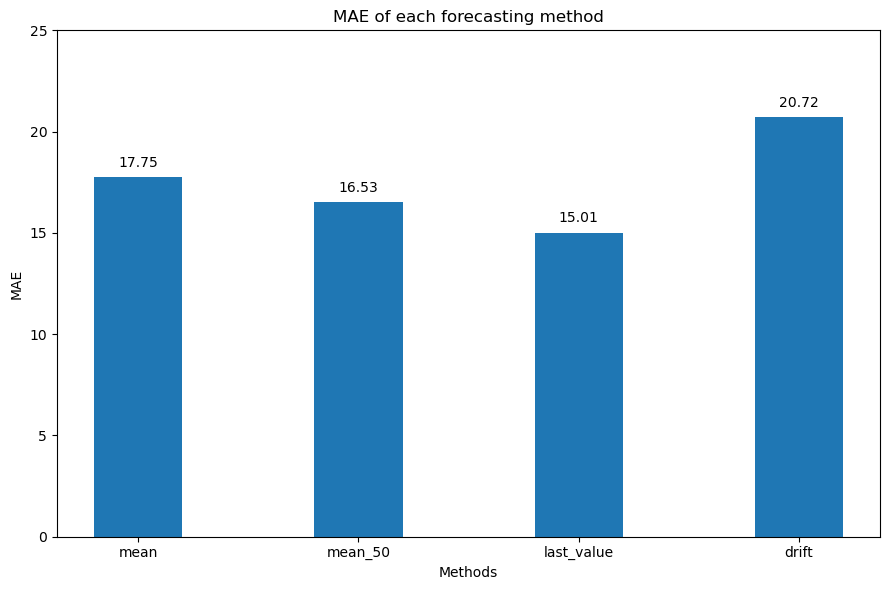

In [39]:
mae_mean = mean_absolute_error(AMZN_test['Close'], AMZN_test['pred_mean'])
mae_mean_50 = mean_absolute_error(AMZN_test['Close'], AMZN_test['pred_mean_50'])
mae_last = mean_absolute_error(AMZN_test['Close'], AMZN_test['pred_last'])
mae_drift = mean_absolute_error(AMZN_test['Close'], AMZN_test['pred_drift'])

fig, ax = plt.subplots()

x = ['mean', 'mean_50', 'last_value', 'drift']
y = [mae_mean, mae_mean_50, mae_last, mae_drift]

ax.bar(x, y, width=0.4)
ax.set_xlabel('Methods')
ax.set_ylabel('MAE')
ax.set_ylim(0, 25)

for index, value in enumerate(y):
    plt.text(x=index, y=value+0.5, s=str(round(value, 2)), ha='center')

plt.title('MAE of each forecasting method')
plt.tight_layout()

### Forecasting the next time step 

In [40]:
df_shift = df.shift(periods=1)

df_shift.head()

,value
0,NaN
1,0.000000
2,0.400157
3,1.378895
4,3.619788


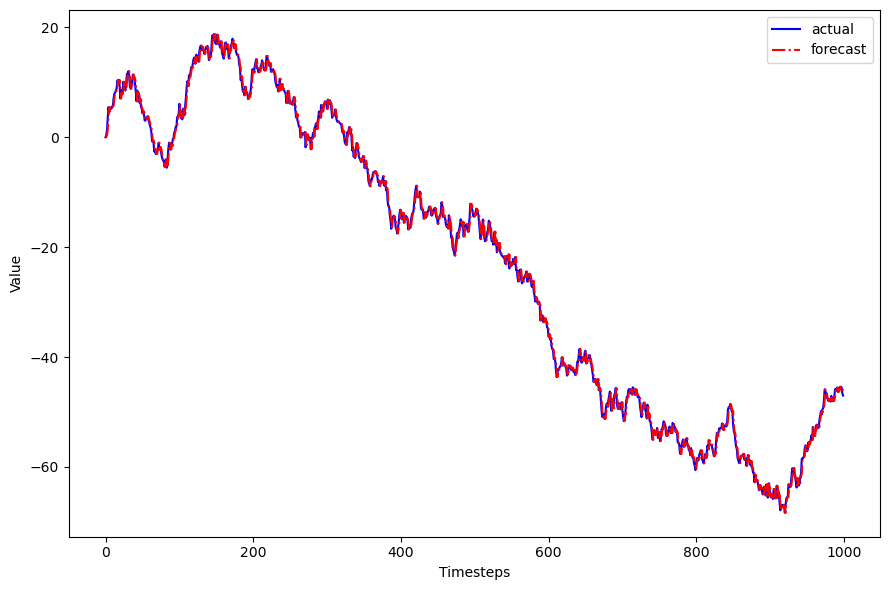

In [41]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc='best')

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.tight_layout()

#### Evaluation

In [42]:
mae_one_step = mean_absolute_error(test['value'], df_shift[800:])

mae_one_step

0.7397491936153824

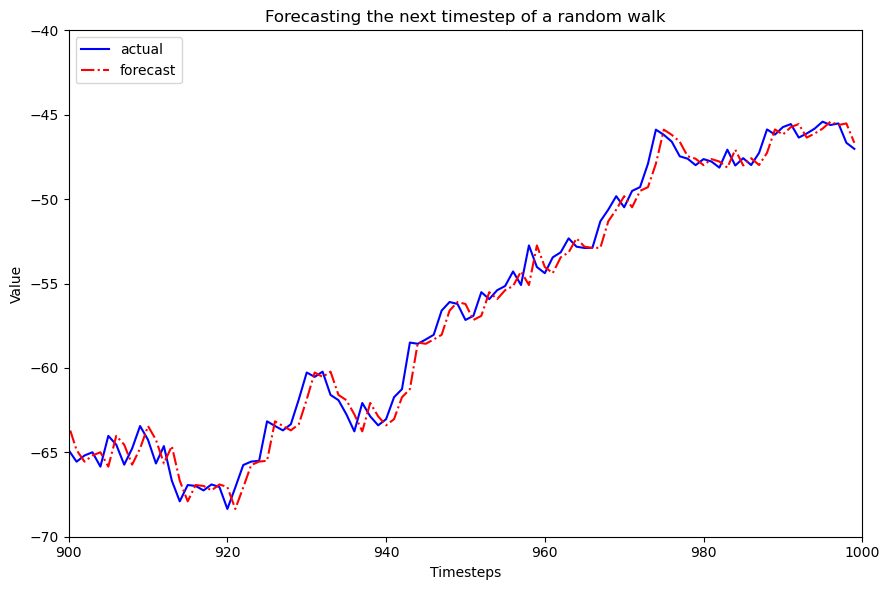

In [43]:
fig, ax = plt.subplots()

ax.plot(df, 'b-', label='actual')
ax.plot(df_shift, 'r-.', label='forecast')

ax.legend(loc=2)

ax.set_xlim(900, 1000)
ax.set_ylim(-70, -40)

ax.set_xlabel('Timesteps')
ax.set_ylabel('Value')

plt.title('Forecasting the next timestep of a random walk')

plt.tight_layout()